In [68]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mplfinance as mpf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

import yfinance as yf

In [2]:
with open('synthetic_data.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [3]:
X, y = dataset

In [4]:
X.shape, y.shape

((4808, 11, 4), (4808,))

In [5]:
X_flatten = X.reshape(X.shape[0], -1, )
X_flatten.shape

(4808, 44)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((3846, 44), (962, 44), (3846,), (962,))

In [71]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
clf = RandomForestClassifier(random_state=42)

In [73]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
pred = clf.predict(X_test)

In [75]:
accuracy_score(y_test, pred)

0.8097713097713097

In [76]:
np.unique(y, return_counts=True)

(array(['Advance Block', 'Engulfing Bearish', 'Engulfing Bullish',
        'Evening Star', 'Hammer', 'Hanging Man', 'Morning Star'],
       dtype='<U17'),
 array([  52, 2052, 1796,   10,  248,  639,   11]))

In [77]:
stock_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [78]:
window_size = 11
X_real = []  # Features

# Loop to create 11-day windows and corresponding target labels
for i in range(len(stock_data) - window_size):
    # Slice the data for the current window (only 'Open', 'High', 'Low', 'Close')
    window_data = stock_data.iloc[i:i+window_size]
    
    # Extract features (excluding 'Volume')
    features = window_data[['Open', 'High', 'Low', 'Close']].values.flatten()
    X_real.append(features)

In [81]:
X_real = np.array(X_real)
X_real = scaler.fit_transform(X_real)

In [82]:
def print_pattern(temp):
    data = {
            'Open':temp[0],
            'High':temp[1], 
            'Low': temp[2], 
            'Close': temp[3]
        }
    
    # Create a DataFrame
    df = pd.DataFrame(data)
    
    # Create a dummy date range to use as an index
    df.index = pd.date_range(start="2023-01-01", periods=len(df), freq="D")
    
    # Plot the candlestick chart
    mpf.plot(df, type='candle', style='yahoo')

In [83]:
probs = clf.predict_proba(X_real)
preds = clf.predict(X_real)
captured = temp[np.max(probs, axis=1) > 0.8]

[[70.5        72.70500183 70.30750275 72.25749969 65.9375     69.52249908
  65.75       66.54250336 69.28500366 71.61000061 67.34249878]
 [71.33499908 69.34750366 70.30500031 67.96499634 68.85749817 63.98500061
  67.5        62.         62.05749893 66.22250366 69.98000336]
 [63.23749924 69.49250031 60.48749924 64.76999664 60.         60.55250168
  61.87749863 64.40249634 59.59999847 63.21500015 59.94250107]
 [62.5        59.27999878 61.66749954 61.84749985 63.20999908 60.65250015
  61.19499969 61.79499817 62.95750046 57.         57.31000137]]


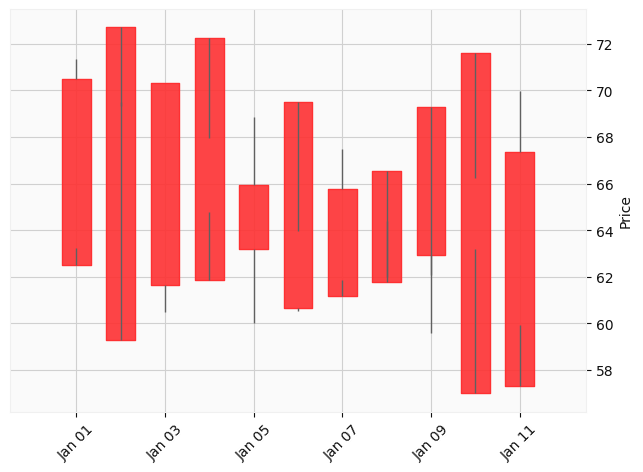

[[91.25       92.19750214 89.62999725 90.01499939 90.17500305 91.25
  89.39250183 91.20999908 91.10250092 91.33000183 88.25499725]
 [88.40750122 88.3125     90.54250336 87.81999969 90.44499969 90.01999664
  91.49500275 90.         91.19999695 91.27999878 91.83999634]
 [90.97750092 91.02749634 91.96250153 92.61750031 90.91000366 91.02749634
  92.5        93.94499969 92.46749878 93.46250153 93.85250092]
 [94.65499878 93.05750275 93.17250061 94.18000031 95.375      94.08999634
  95.34249878 96.26249695 96.31749725 94.67250061 95.75250244]]


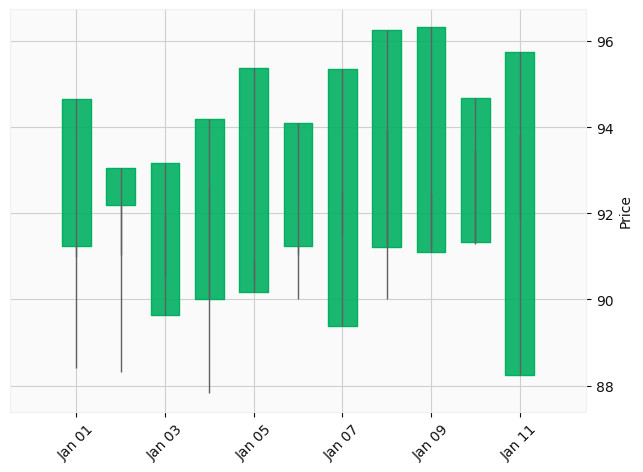

[[90.17500305 91.25       89.39250183 91.20999908 91.10250092 91.33000183
  88.25499725 88.40750122 88.3125     90.54250336 87.81999969]
 [90.44499969 90.01999664 91.49500275 90.         91.19999695 91.27999878
  91.83999634 90.97750092 91.02749634 91.96250153 92.61750031]
 [90.91000366 91.02749634 92.5        93.94499969 92.46749878 93.46250153
  93.85250092 94.65499878 93.05750275 93.17250061 94.18000031]
 [95.375      94.08999634 95.34249878 96.26249695 96.31749725 94.67250061
  95.75250244 95.33499908 95.98000336 94.70500183 95.91999817]]


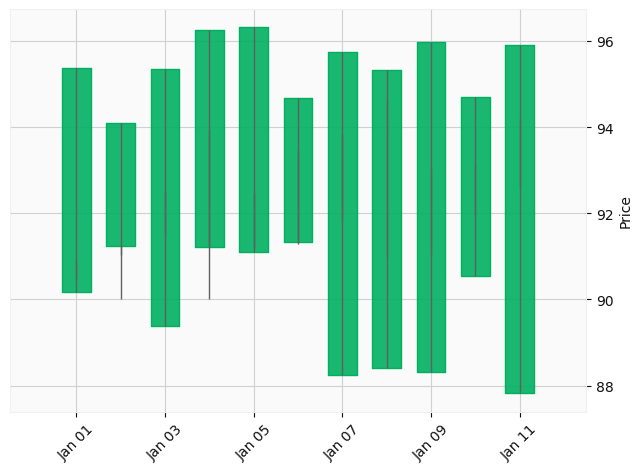

[[91.10250092 91.33000183 88.25499725 88.40750122 88.3125     90.54250336
  87.81999969 90.44499969 90.01999664 91.49500275 90.        ]
 [91.19999695 91.27999878 91.83999634 90.97750092 91.02749634 91.96250153
  92.61750031 90.91000366 91.02749634 92.5        93.94499969]
 [92.46749878 93.46250153 93.85250092 94.65499878 93.05750275 93.17250061
  94.18000031 95.375      94.08999634 95.34249878 96.26249695]
 [96.31749725 94.67250061 95.75250244 95.33499908 95.98000336 94.70500183
  95.91999817 97.26499939 99.95500183 95.25749969 95.47750092]]


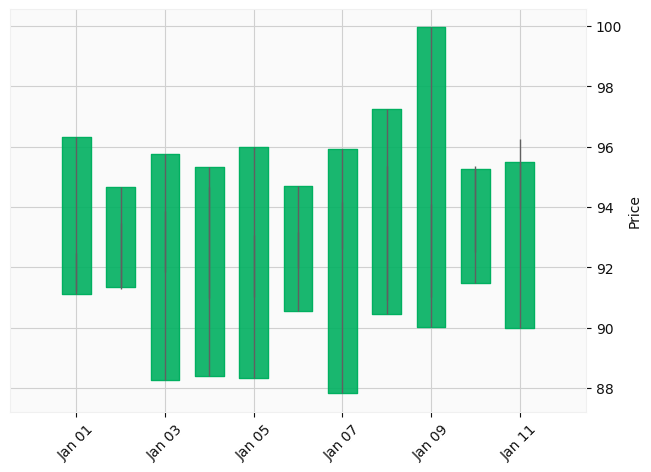

[[90.01999664 91.49500275 90.         91.19999695 91.27999878 91.83999634
  90.97750092 91.02749634 91.96250153 92.61750031 90.91000366]
 [91.02749634 92.5        93.94499969 92.46749878 93.46250153 93.85250092
  94.65499878 93.05750275 93.17250061 94.18000031 95.375     ]
 [94.08999634 95.34249878 96.26249695 96.31749725 94.67250061 95.75250244
  95.33499908 95.98000336 94.70500183 95.91999817 97.26499939]
 [99.95500183 95.25749969 95.47750092 94.83999634 97.25499725 93.87750244
  97.05750275 98.98999786 99.24749756 96.48999786 97.72499847]]


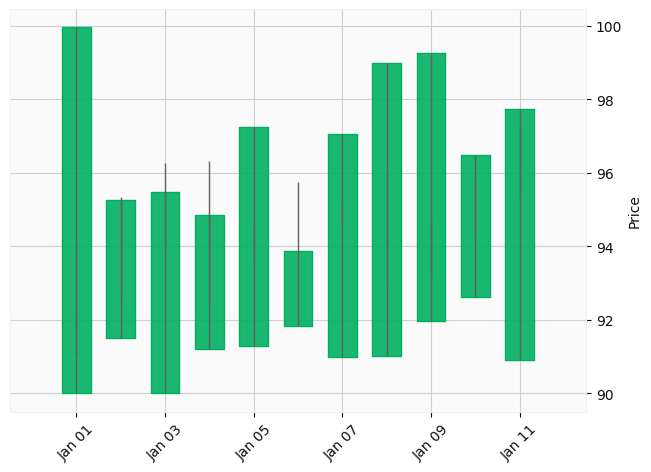

[[91.27999878 91.83999634 90.97750092 91.02749634 91.96250153 92.61750031
  90.91000366 91.02749634 92.5        93.94499969 92.46749878]
 [93.46250153 93.85250092 94.65499878 93.05750275 93.17250061 94.18000031
  95.375      94.08999634 95.34249878 96.26249695 96.31749725]
 [94.67250061 95.75250244 95.33499908 95.98000336 94.70500183 95.91999817
  97.26499939 99.95500183 95.25749969 95.47750092 94.83999634]
 [97.25499725 93.87750244 97.05750275 98.98999786 99.24749756 96.48999786
  97.72499847 96.5625     97.40499878 95.90499878 96.52249908]]


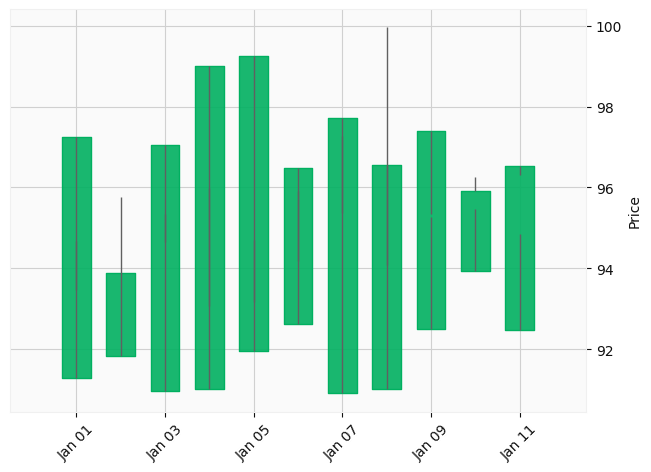

[[91.96250153 92.61750031 90.91000366 91.02749634 92.5        93.94499969
  92.46749878 93.46250153 93.85250092 94.65499878 93.05750275]
 [93.17250061 94.18000031 95.375      94.08999634 95.34249878 96.26249695
  96.31749725 94.67250061 95.75250244 95.33499908 95.98000336]
 [94.70500183 95.91999817 97.26499939 99.95500183 95.25749969 95.47750092
  94.83999634 97.25499725 93.87750244 97.05750275 98.98999786]
 [99.24749756 96.48999786 97.72499847 96.5625     97.40499878 95.90499878
  96.52249908 96.98750305 97.14749908 95.83999634 96.32749939]]


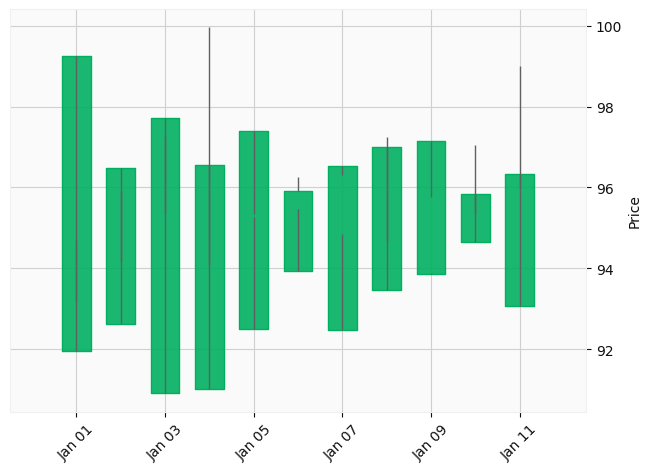

[[177.8999939  180.83999634 177.46000671 180.57000732 181.5
  182.22999573 180.63000488 180.96000671 181.27000427 183.88999939
  180.97000122]
 [183.78999329 182.80000305 184.1499939  182.44000244 183.30999756
  183.36999512 184.38999939 182.02000427 183.94999695 183.96000671
  186.52000427]
 [183.77999878 186.00999451 186.72999573 186.99000549 184.27000427
  184.91999817 184.41000366 186.1000061  184.41000366 185.00999451
  184.8999939 ]
 [185.41000366 182.58999634 183.96000671 183.74000549 187.05000305
  183.66999817 187.         185.55000305 187.55999756 185.00999451
  186.67999268]]


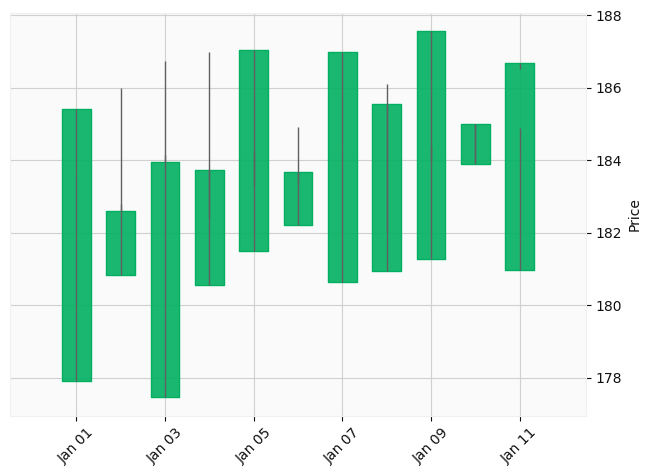

[[181.5        182.22999573 180.63000488 180.96000671 181.27000427
  183.88999939 180.97000122 183.78999329 182.80000305 184.1499939
  182.44000244]
 [183.30999756 183.36999512 184.38999939 182.02000427 183.94999695
  183.96000671 186.52000427 183.77999878 186.00999451 186.72999573
  186.99000549]
 [184.27000427 184.91999817 184.41000366 186.1000061  184.41000366
  185.00999451 184.8999939  185.41000366 182.58999634 183.96000671
  183.74000549]
 [187.05000305 183.66999817 187.         185.55000305 187.55999756
  185.00999451 186.67999268 186.83000183 188.05000305 185.22999573
  185.27000427]]


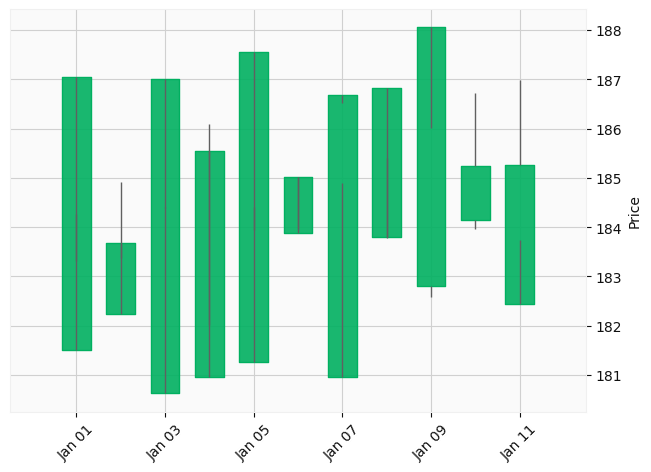

[[181.27000427 183.88999939 180.97000122 183.78999329 182.80000305
  184.1499939  182.44000244 183.30999756 183.36999512 184.38999939
  182.02000427]
 [183.94999695 183.96000671 186.52000427 183.77999878 186.00999451
  186.72999573 186.99000549 184.27000427 184.91999817 184.41000366
  186.1000061 ]
 [184.41000366 185.00999451 184.8999939  185.41000366 182.58999634
  183.96000671 183.74000549 187.05000305 183.66999817 187.
  185.55000305]
 [187.55999756 185.00999451 186.67999268 186.83000183 188.05000305
  185.22999573 185.27000427 185.88999939 188.38999939 185.66999817
  188.05999756]]


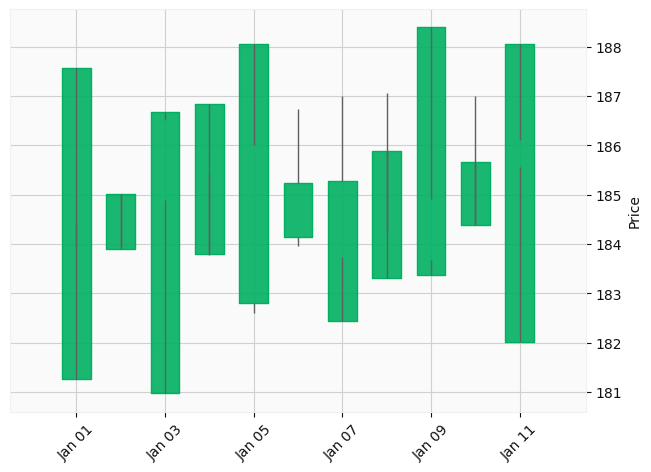

[[182.80000305 184.1499939  182.44000244 183.30999756 183.36999512
  184.38999939 182.02000427 183.94999695 183.96000671 186.52000427
  183.77999878]
 [186.00999451 186.72999573 186.99000549 184.27000427 184.91999817
  184.41000366 186.1000061  184.41000366 185.00999451 184.8999939
  185.41000366]
 [182.58999634 183.96000671 183.74000549 187.05000305 183.66999817
  187.         185.55000305 187.55999756 185.00999451 186.67999268
  186.83000183]
 [188.05000305 185.22999573 185.27000427 185.88999939 188.38999939
  185.66999817 188.05999756 187.92999268 189.8999939  187.6000061
  189.25      ]]


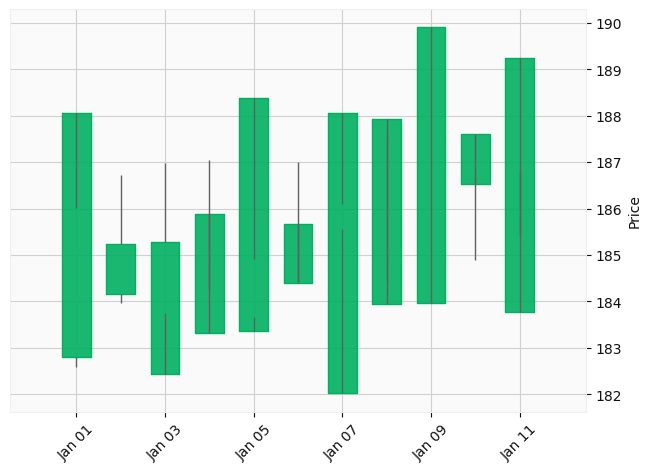

[[183.36999512 184.38999939 182.02000427 183.94999695 183.96000671
  186.52000427 183.77999878 186.00999451 186.72999573 186.99000549
  184.27000427]
 [184.91999817 184.41000366 186.1000061  184.41000366 185.00999451
  184.8999939  185.41000366 182.58999634 183.96000671 183.74000549
  187.05000305]
 [183.66999817 187.         185.55000305 187.55999756 185.00999451
  186.67999268 186.83000183 188.05000305 185.22999573 185.27000427
  185.88999939]
 [188.38999939 185.66999817 188.05999756 187.92999268 189.8999939
  187.6000061  189.25       189.08000183 190.07000732 188.94000244
  189.58999634]]


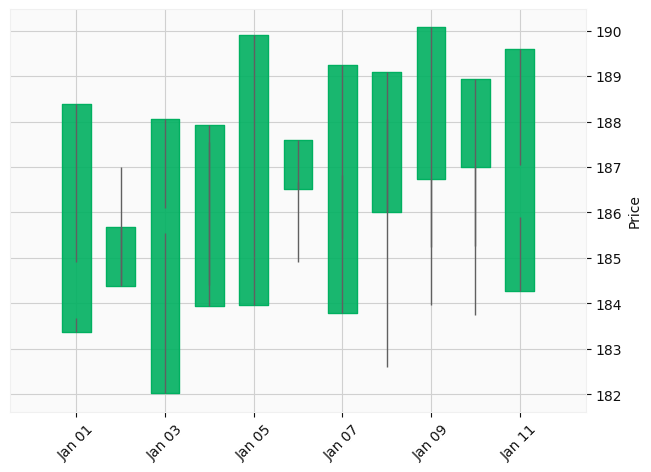

[[183.96000671 186.52000427 183.77999878 186.00999451 186.72999573
  186.99000549 184.27000427 184.91999817 184.41000366 186.1000061
  184.41000366]
 [185.00999451 184.8999939  185.41000366 182.58999634 183.96000671
  183.74000549 187.05000305 183.66999817 187.         185.55000305
  187.55999756]
 [185.00999451 186.67999268 186.83000183 188.05000305 185.22999573
  185.27000427 185.88999939 188.38999939 185.66999817 188.05999756
  187.92999268]
 [189.8999939  187.6000061  189.25       189.08000183 190.07000732
  188.94000244 189.58999634 191.63000488 194.47999573 191.25999451
  193.97000122]]


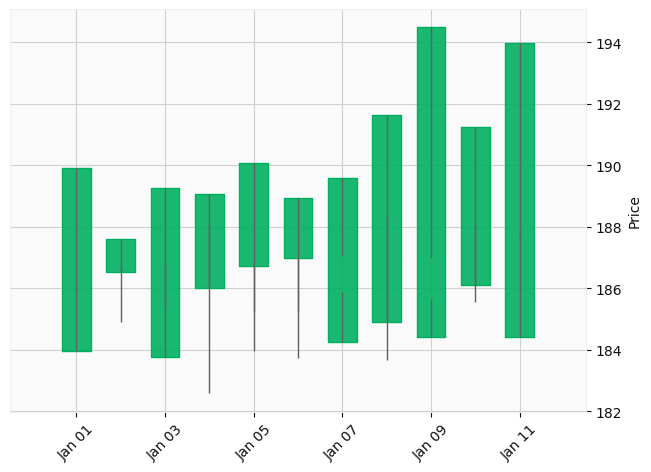

[[186.72999573 186.99000549 184.27000427 184.91999817 184.41000366
  186.1000061  184.41000366 185.00999451 184.8999939  185.41000366
  182.58999634]
 [183.96000671 183.74000549 187.05000305 183.66999817 187.
  185.55000305 187.55999756 185.00999451 186.67999268 186.83000183
  188.05000305]
 [185.22999573 185.27000427 185.88999939 188.38999939 185.66999817
  188.05999756 187.92999268 189.8999939  187.6000061  189.25
  189.08000183]
 [190.07000732 188.94000244 189.58999634 191.63000488 194.47999573
  191.25999451 193.97000122 193.77999878 193.88000488 191.75999451
  192.46000671]]


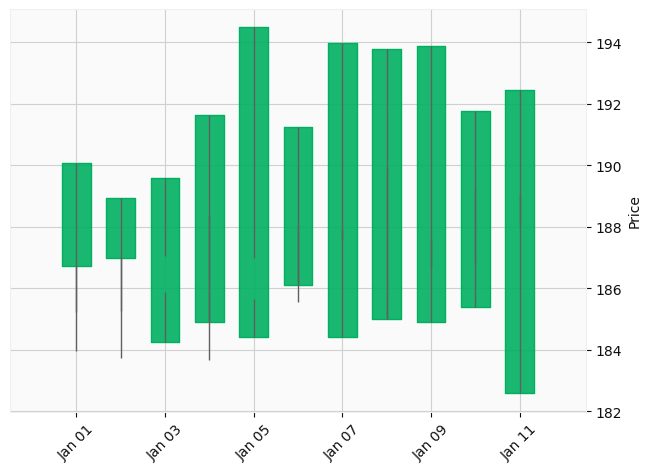

[[184.41000366 186.1000061  184.41000366 185.00999451 184.8999939
  185.41000366 182.58999634 183.96000671 183.74000549 187.05000305
  183.66999817]
 [187.         185.55000305 187.55999756 185.00999451 186.67999268
  186.83000183 188.05000305 185.22999573 185.27000427 185.88999939
  188.38999939]
 [185.66999817 188.05999756 187.92999268 189.8999939  187.6000061
  189.25       189.08000183 190.07000732 188.94000244 189.58999634
  191.63000488]
 [194.47999573 191.25999451 193.97000122 193.77999878 193.88000488
  191.75999451 192.46000671 191.57000732 192.97999573 190.61999512
  191.33000183]]


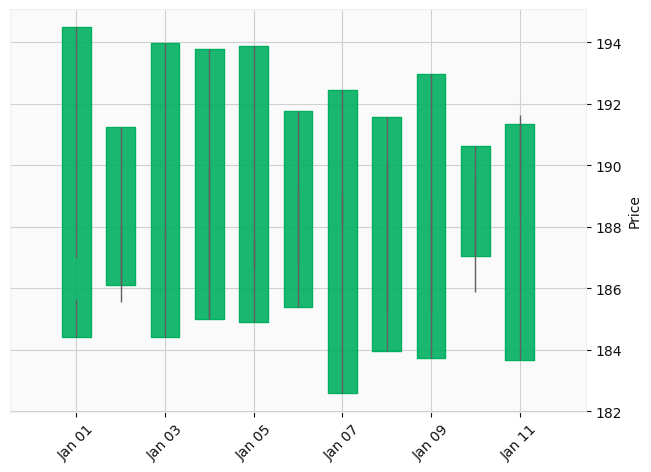

[[184.8999939  185.41000366 182.58999634 183.96000671 183.74000549
  187.05000305 183.66999817 187.         185.55000305 187.55999756
  185.00999451]
 [186.67999268 186.83000183 188.05000305 185.22999573 185.27000427
  185.88999939 188.38999939 185.66999817 188.05999756 187.92999268
  189.8999939 ]
 [187.6000061  189.25       189.08000183 190.07000732 188.94000244
  189.58999634 191.63000488 194.47999573 191.25999451 193.97000122
  193.77999878]
 [193.88000488 191.75999451 192.46000671 191.57000732 192.97999573
  190.61999512 191.33000183 189.83999634 192.02000427 189.19999695
  191.80999756]]


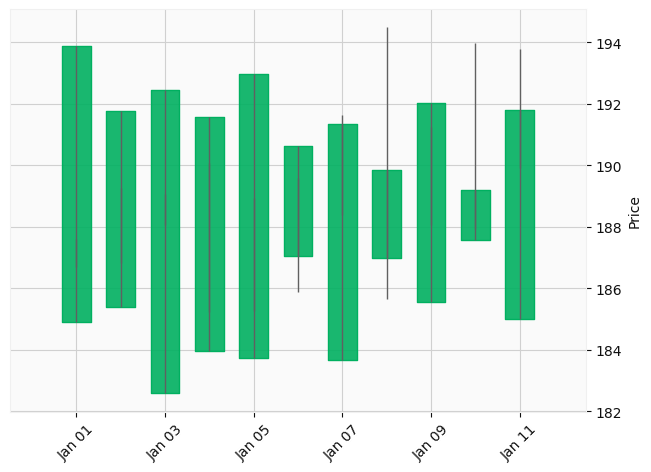

[[183.74000549 187.05000305 183.66999817 187.         185.55000305
  187.55999756 185.00999451 186.67999268 186.83000183 188.05000305
  185.22999573]
 [185.27000427 185.88999939 188.38999939 185.66999817 188.05999756
  187.92999268 189.8999939  187.6000061  189.25       189.08000183
  190.07000732]
 [188.94000244 189.58999634 191.63000488 194.47999573 191.25999451
  193.97000122 193.77999878 193.88000488 191.75999451 192.46000671
  191.57000732]
 [192.97999573 190.61999512 191.33000183 189.83999634 192.02000427
  189.19999695 191.80999756 191.41000366 192.66999817 190.24000549
  190.67999268]]


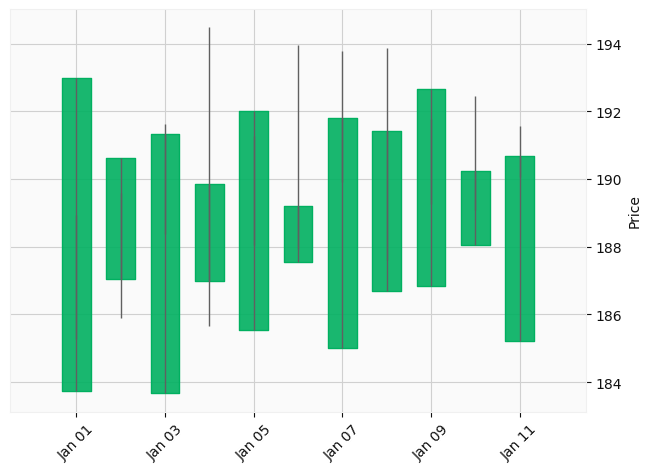

[[185.55000305 187.55999756 185.00999451 186.67999268 186.83000183
  188.05000305 185.22999573 185.27000427 185.88999939 188.38999939
  185.66999817]
 [188.05999756 187.92999268 189.8999939  187.6000061  189.25
  189.08000183 190.07000732 188.94000244 189.58999634 191.63000488
  194.47999573]
 [191.25999451 193.97000122 193.77999878 193.88000488 191.75999451
  192.46000671 191.57000732 192.97999573 190.61999512 191.33000183
  189.83999634]
 [192.02000427 189.19999695 191.80999756 191.41000366 192.66999817
  190.24000549 190.67999268 189.25999451 189.99000549 187.03999329
  188.61000061]]


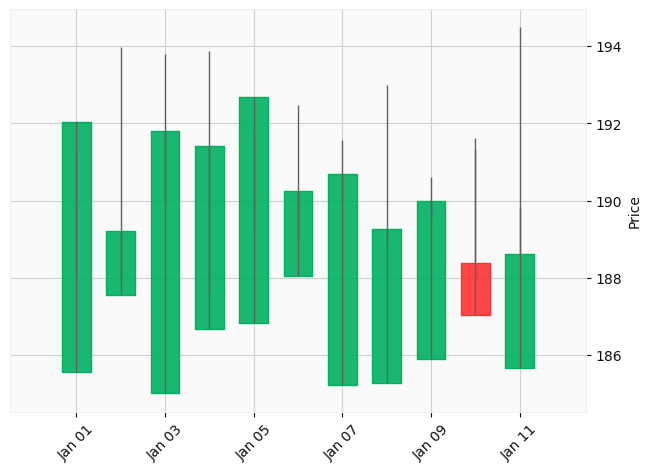

[[177.05999756 177.67999268 176.25       177.22999573 178.52000427
  181.55000305 178.33000183 181.11999512 180.66999817 181.1000061
  176.00999451]
 [176.38000488 177.38000488 179.1499939  175.82000732 178.61000061
  180.08999634 180.58999634 178.55000305 180.19000244 179.69999695
  184.8999939 ]
 [179.5        184.11999512 184.94000244 187.8500061  184.74000549
  187.6499939  187.83999634 189.11999512 187.47999573 187.86999512
  189.49000549]
 [189.91999817 188.27999878 189.46000671 188.27999878 189.97999573
  187.61000061 189.69999695 188.3999939  188.8500061  181.47000122
  182.91000366]]


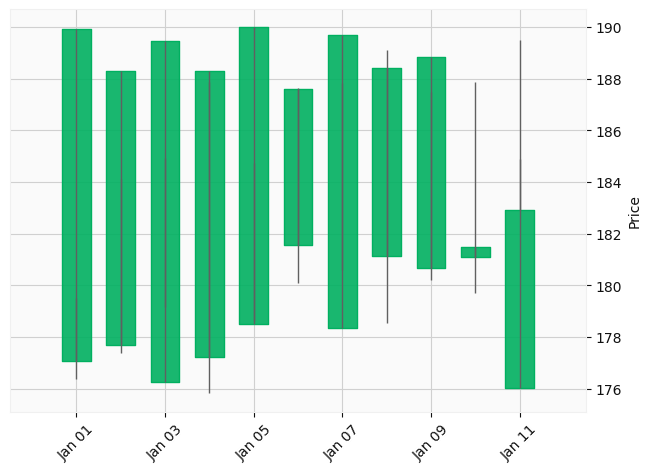

[[174.24000549 176.82000732 173.3500061  176.6499939  176.38000488
  179.42999268 176.21000671 179.22999573 179.17999268 182.44000244
  178.97000122]
 [181.82000732 182.3500061  183.44999695 181.58999634 182.88999939
  182.96000671 184.11999512 181.80999756 182.41000366 183.97000122
  186.57000732]
 [183.52999878 186.3999939  185.82000732 186.02999878 184.21000671
  184.80000305 187.69999695 188.11000061 186.30000305 187.44000244
  187.8500061 ]
 [189.5        187.77999878 188.00999451 189.57000732 190.96000671
  188.6499939  189.71000671 190.25       190.38000488 188.57000732
  189.69000244]]


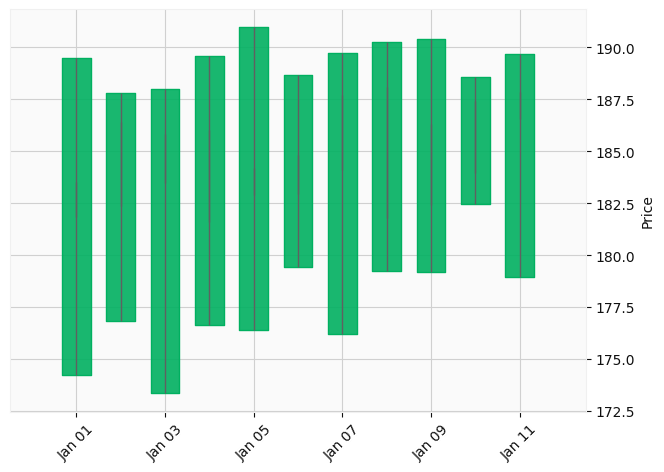

[[176.38000488 179.42999268 176.21000671 179.22999573 179.17999268
  182.44000244 178.97000122 181.82000732 182.3500061  183.44999695
  181.58999634]
 [182.88999939 182.96000671 184.11999512 181.80999756 182.41000366
  183.97000122 186.57000732 183.52999878 186.3999939  185.82000732
  186.02999878]
 [184.21000671 184.80000305 187.69999695 188.11000061 186.30000305
  187.44000244 187.8500061  189.5        187.77999878 188.00999451
  189.57000732]
 [190.96000671 188.6499939  189.71000671 190.25       190.38000488
  188.57000732 189.69000244 189.88999939 191.91000366 189.88000488
  191.44999695]]


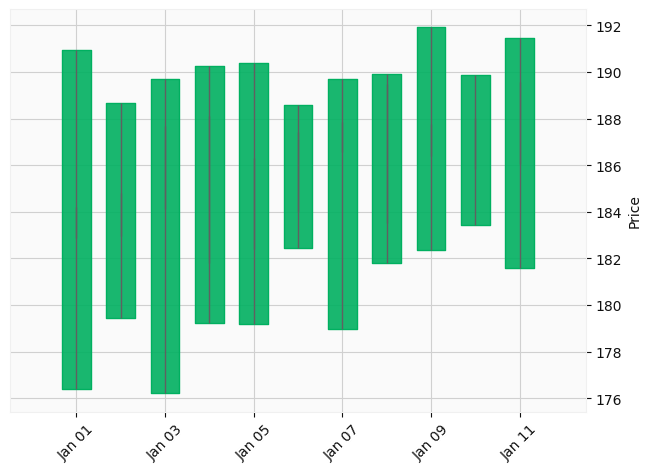

[[179.17999268 182.44000244 178.97000122 181.82000732 182.3500061
  183.44999695 181.58999634 182.88999939 182.96000671 184.11999512
  181.80999756]
 [182.41000366 183.97000122 186.57000732 183.52999878 186.3999939
  185.82000732 186.02999878 184.21000671 184.80000305 187.69999695
  188.11000061]
 [186.30000305 187.44000244 187.8500061  189.5        187.77999878
  188.00999451 189.57000732 190.96000671 188.6499939  189.71000671
  190.25      ]
 [190.38000488 188.57000732 189.69000244 189.88999939 191.91000366
  189.88000488 191.44999695 191.41000366 191.52000427 189.74000549
  190.63999939]]


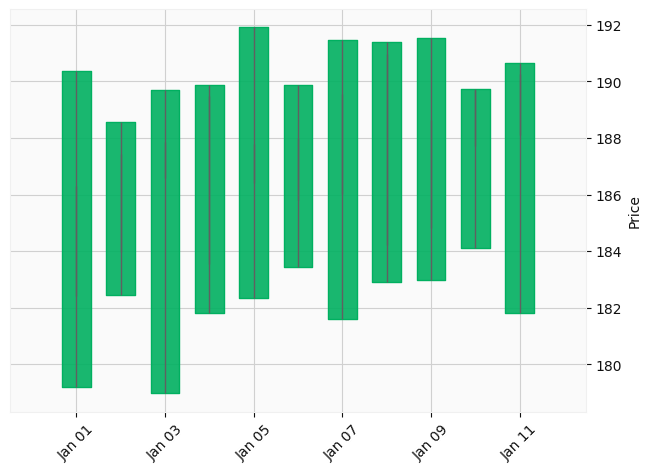

[[182.3500061  183.44999695 181.58999634 182.88999939 182.96000671
  184.11999512 181.80999756 182.41000366 183.97000122 186.57000732
  183.52999878]
 [186.3999939  185.82000732 186.02999878 184.21000671 184.80000305
  187.69999695 188.11000061 186.30000305 187.44000244 187.8500061
  189.5       ]
 [187.77999878 188.00999451 189.57000732 190.96000671 188.6499939
  189.71000671 190.25       190.38000488 188.57000732 189.69000244
  189.88999939]
 [191.91000366 189.88000488 191.44999695 191.41000366 191.52000427
  189.74000549 190.63999939 191.49000549 192.92999268 190.83000183
  191.30999756]]


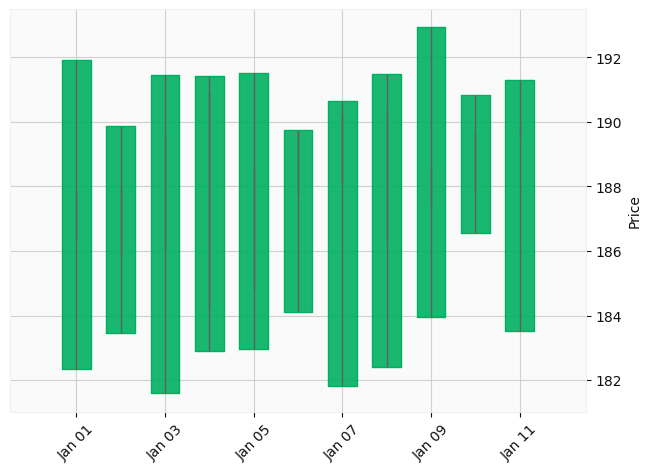

[[182.96000671 184.11999512 181.80999756 182.41000366 183.97000122
  186.57000732 183.52999878 186.3999939  185.82000732 186.02999878
  184.21000671]
 [184.80000305 187.69999695 188.11000061 186.30000305 187.44000244
  187.8500061  189.5        187.77999878 188.00999451 189.57000732
  190.96000671]
 [188.6499939  189.71000671 190.25       190.38000488 188.57000732
  189.69000244 189.88999939 191.91000366 189.88000488 191.44999695
  191.41000366]
 [191.52000427 189.74000549 190.63999939 191.49000549 192.92999268
  190.83000183 191.30999756 190.86999512 190.8999939  189.25
  189.97000122]]


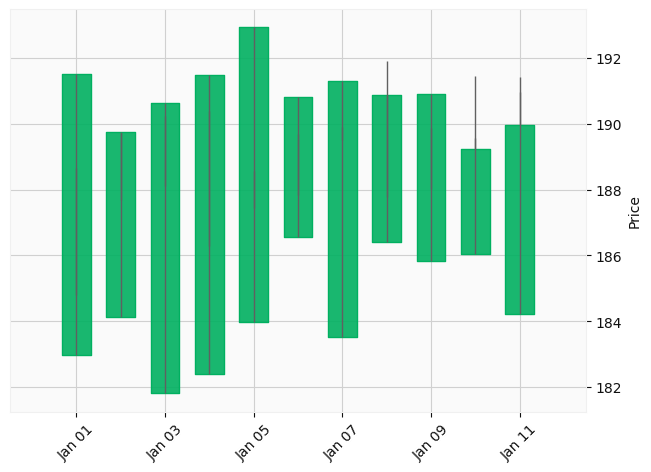

[[183.97000122 186.57000732 183.52999878 186.3999939  185.82000732
  186.02999878 184.21000671 184.80000305 187.69999695 188.11000061
  186.30000305]
 [187.44000244 187.8500061  189.5        187.77999878 188.00999451
  189.57000732 190.96000671 188.6499939  189.71000671 190.25
  190.38000488]
 [188.57000732 189.69000244 189.88999939 191.91000366 189.88000488
  191.44999695 191.41000366 191.52000427 189.74000549 190.63999939
  191.49000549]
 [192.92999268 190.83000183 191.30999756 190.86999512 190.8999939
  189.25       189.97000122 189.91999817 190.66999817 188.8999939
  189.78999329]]


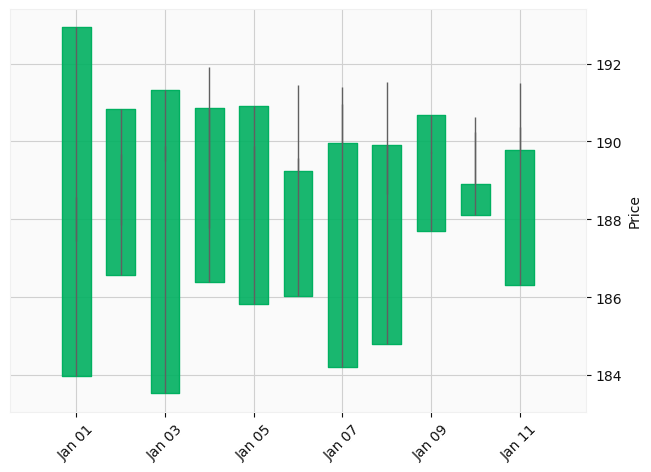

[[185.82000732 186.02999878 184.21000671 184.80000305 187.69999695
  188.11000061 186.30000305 187.44000244 187.8500061  189.5
  187.77999878]
 [188.00999451 189.57000732 190.96000671 188.6499939  189.71000671
  190.25       190.38000488 188.57000732 189.69000244 189.88999939
  191.91000366]
 [189.88000488 191.44999695 191.41000366 191.52000427 189.74000549
  190.63999939 191.49000549 192.92999268 190.83000183 191.30999756
  190.86999512]
 [190.8999939  189.25       189.97000122 189.91999817 190.66999817
  188.8999939  189.78999329 189.77999878 191.08000183 189.3999939
  190.3999939 ]]


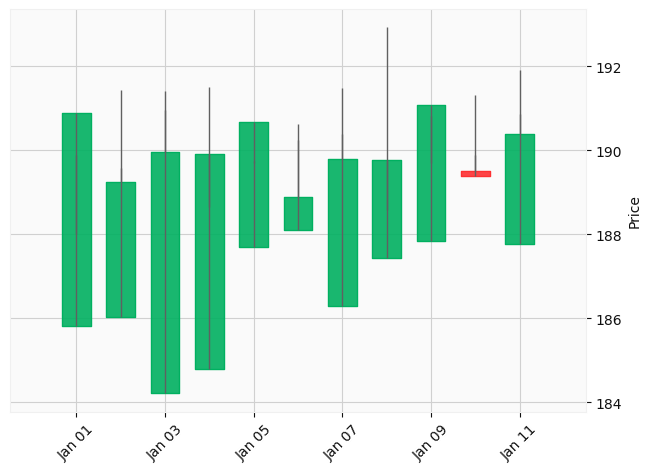

In [85]:
for i in captured:
    j = i.reshape(4, 11)
    print(j)
    print_pattern(j)